In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load datasets
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")
customers = pd.read_csv("Customers.csv")

In [4]:
#Merge datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left')


In [5]:
# Feature engineering: Customer-level features
customer_features = merged_data.groupby('CustomerID').agg(
    TotalSpending=('TotalValue', 'sum'),
    NumTransactions=('TransactionID', 'count'),
    AvgTransactionValue=('TotalValue', 'mean'),
    Recency=('TransactionDate', lambda x: (pd.Timestamp.now() - pd.to_datetime(x).max()).days)
).reset_index()

In [6]:
# Merge with profile data
customer_features = customer_features.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')


In [7]:
# One-hot encode the 'Region' feature
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [8]:
# Drop CustomerID for clustering
clustering_data = customer_features.drop('CustomerID', axis=1)


In [9]:
# Normalize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

In [22]:
# Perform clustering
#finding efficient value of clusters, better the clustring less the value of DB index

db_index=1000
for k in range(2,10):
    
    num_clusters = k 
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data) 
    if db_index == min (davies_bouldin_score(scaled_data, cluster_labels),db_index):
        continue
    else:
        db_index= davies_bouldin_score(scaled_data, cluster_labels)
        print(k)

C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2


C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3


C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4


C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


5


C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


6


C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


7


C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


8


C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


9


In [ ]:
#Hence the most efficient number of cluster is 9

In [23]:
num_clusters = 9 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data) 

C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Natasha Meena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
# Add cluster labels to the dataset
customer_features['Cluster'] = cluster_labels

In [25]:
# Evaluate clusters using Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, cluster_labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.0289431154491853


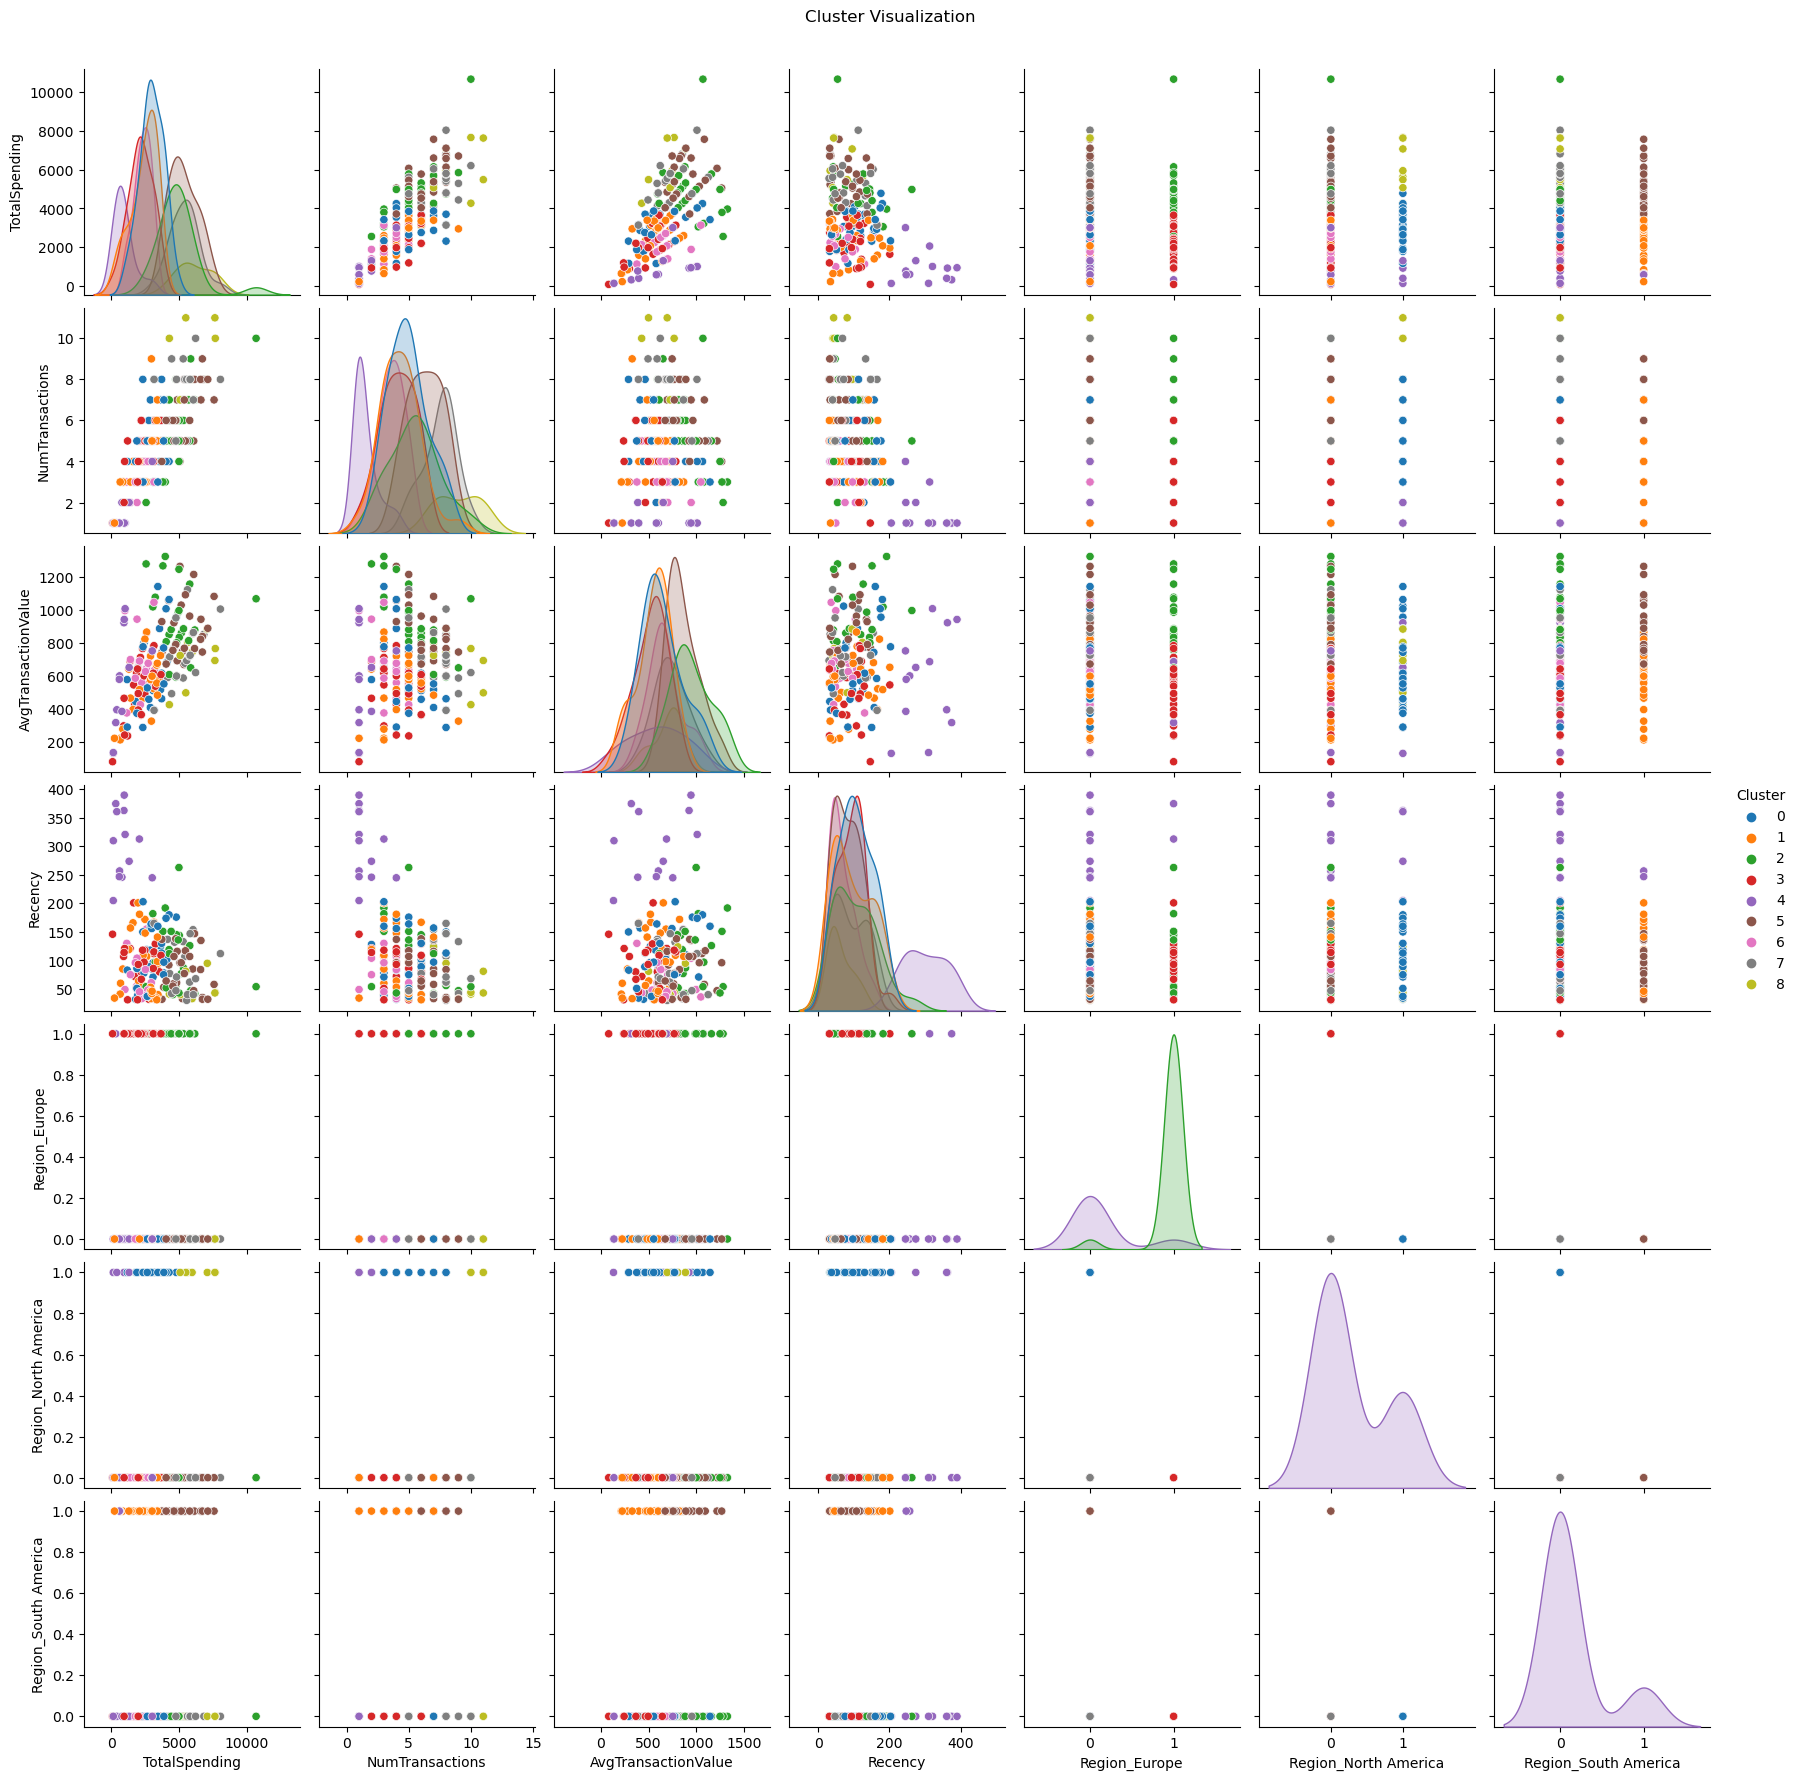

In [26]:
# Visualize clusters using a pairplot
sns.pairplot(customer_features, hue='Cluster', diag_kind='kde', palette='tab10')
plt.suptitle("Cluster Visualization", y=1.02)
plt.show()

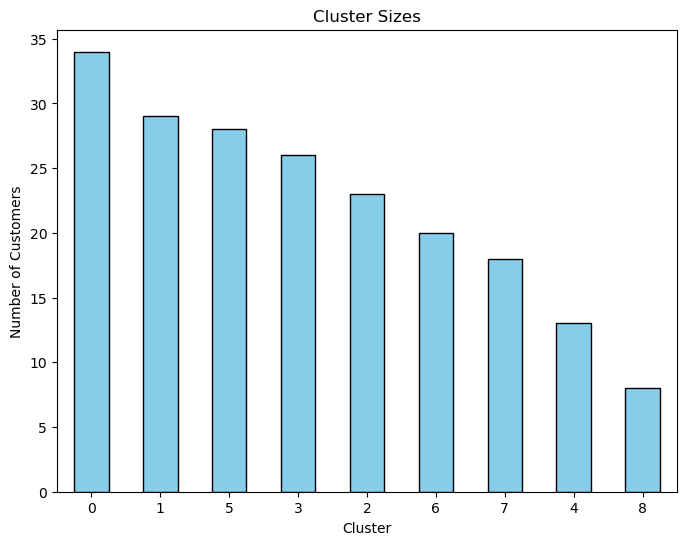

In [27]:
# Visualize cluster sizes
plt.figure(figsize=(8, 6))
customer_features['Cluster'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

In [28]:
customer_features['Cluster'].value_counts()

0    34
1    29
5    28
3    26
2    23
6    20
7    18
4    13
8     8
Name: Cluster, dtype: int64